In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
FOLDS = 5
N_JOBS = 6
SEED = 2016


In [2]:
# Load test sets
y_test_y1 = pd.read_csv("clean_data/y_test_y1.csv")
y_test_y2 = pd.read_csv("clean_data/y_test_y2.csv")
y_test_y3 = pd.read_csv("clean_data/y_test_y3.csv")
y_test_y4 = pd.read_csv("clean_data/y_test_y4.csv")
y_test_y5 = pd.read_csv("clean_data/y_test_y5.csv")


In [3]:
# Load  predictions on held out fold
preds_y_test1 = []
preds_y_test2 = []
preds_y_test3 = []
preds_y_test4 = []
preds_y_test5 = []

'''XGB_Base1 = pd.read_csv("y_test_preds/XGB_y1_Base.csv", sep = ";")
XGB_Base2 = pd.read_csv("y_test_preds/XGB_y2_Base.csv", sep = ";")
XGB_Base3 = pd.read_csv("y_test_preds/XGB_y3_Base.csv", sep = ";")
XGB_Base4 = pd.read_csv("y_test_preds/XGB_y4_Base.csv", sep = ";")
XGB_Base5 = pd.read_csv("y_test_preds/XGB_y5_Base.csv", sep = ";")
XGB_Time1 = pd.read_csv("y_test_preds/XGB_y1_Time.csv", sep = ";")
XGB_Time2 = pd.read_csv("y_test_preds/XGB_y2_Time.csv", sep = ";")
XGB_Time3 = pd.read_csv("y_test_preds/XGB_y3_Time.csv", sep = ";")
XGB_Time4 = pd.read_csv("y_test_preds/XGB_y4_Time.csv", sep = ";")
XGB_Time5 = pd.read_csv("y_test_preds/XGB_y5_Time.csv", sep = ";")'''
XGB_Medians1 = pd.read_csv("y_test_preds/XGB_y1_Medians.csv", sep = ";")
XGB_Medians2 = pd.read_csv("y_test_preds/XGB_y2_Medians.csv", sep = ";")
XGB_Medians3 = pd.read_csv("y_test_preds/XGB_y3_Medians.csv", sep = ";")
XGB_Medians4 = pd.read_csv("y_test_preds/XGB_y4_Medians.csv", sep = ";")
XGB_Medians5 = pd.read_csv("y_test_preds/XGB_y5_Medians.csv", sep = ";")
'''XGB_Lags1 = pd.read_csv("y_test_preds/XGB_y1_Lags.csv", sep = ";")
XGB_Lags2 = pd.read_csv("y_test_preds/XGB_y2_Lags.csv", sep = ";")
XGB_Lags3 = pd.read_csv("y_test_preds/XGB_y3_Lags.csv", sep = ";")
XGB_Lags4 = pd.read_csv("y_test_preds/XGB_y4_Lags.csv", sep = ";")
XGB_Lags5 = pd.read_csv("y_test_preds/XGB_y5_Lags.csv", sep = ";")'''

'''Lasso_Base1 = pd.read_csv("y_test_preds/Lasso_y1_Base.csv", sep = ";")
Lasso_Base2 = pd.read_csv("y_test_preds/Lasso_y2_Base.csv", sep = ";")
Lasso_Base3 = pd.read_csv("y_test_preds/Lasso_y3_Base.csv", sep = ";")
Lasso_Base4 = pd.read_csv("y_test_preds/Lasso_y4_Base.csv", sep = ";")
Lasso_Base5 = pd.read_csv("y_test_preds/Lasso_y5_Base.csv", sep = ";")
Lasso_Time1 = pd.read_csv("y_test_preds/Lasso_y1_Time.csv", sep = ";")
Lasso_Time2 = pd.read_csv("y_test_preds/Lasso_y2_Time.csv", sep = ";")
Lasso_Time3 = pd.read_csv("y_test_preds/Lasso_y3_Time.csv", sep = ";")
Lasso_Time4 = pd.read_csv("y_test_preds/Lasso_y4_Time.csv", sep = ";")
Lasso_Time5 = pd.read_csv("y_test_preds/Lasso_y5_Time.csv", sep = ";")
Lasso_Medians1 = pd.read_csv("y_test_preds/Lasso_y1_Medians.csv", sep = ";")
Lasso_Medians2 = pd.read_csv("y_test_preds/Lasso_y2_Medians.csv", sep = ";")
Lasso_Medians3 = pd.read_csv("y_test_preds/Lasso_y3_Medians.csv", sep = ";")
Lasso_Medians4 = pd.read_csv("y_test_preds/Lasso_y4_Medians.csv", sep = ";")
Lasso_Medians5 = pd.read_csv("y_test_preds/Lasso_y5_Medians.csv", sep = ";")
Lasso_Lags1 = pd.read_csv("y_test_preds/Lasso_y1_Lags.csv", sep = ";")
Lasso_Lags2 = pd.read_csv("y_test_preds/Lasso_y2_Lags.csv", sep = ";")
Lasso_Lags3 = pd.read_csv("y_test_preds/Lasso_y3_Lags.csv", sep = ";")
Lasso_Lags4 = pd.read_csv("y_test_preds/Lasso_y4_Lags.csv", sep = ";")
Lasso_Lags5 = pd.read_csv("y_test_preds/Lasso_y5_Lags.csv", sep = ";")'''

LGBM_Medians1 = pd.read_csv("y_test_preds/LGBM_y1_Medians.csv", sep = ";")
LGBM_Medians2 = pd.read_csv("y_test_preds/LGBM_y2_Medians.csv", sep = ";")
LGBM_Medians3 = pd.read_csv("y_test_preds/LGBM_y3_Medians.csv", sep = ";")
LGBM_Medians4 = pd.read_csv("y_test_preds/LGBM_y4_Medians.csv", sep = ";")
LGBM_Medians5 = pd.read_csv("y_test_preds/LGBM_y5_Medians.csv", sep = ";")

'''preds_y_test1.append(XGB_Base1.y1)
preds_y_test2.append(XGB_Base2.y2)
preds_y_test3.append(XGB_Base3.y3)
preds_y_test4.append(XGB_Base4.y4)
preds_y_test5.append(XGB_Base5.y5)
preds_y_test1.append(XGB_Time1.y1)
preds_y_test2.append(XGB_Time2.y2)
preds_y_test3.append(XGB_Time3.y3)
preds_y_test4.append(XGB_Time4.y4)
preds_y_test5.append(XGB_Time5.y5)'''
preds_y_test1.append(XGB_Medians1.y1)
preds_y_test2.append(XGB_Medians2.y2)
preds_y_test3.append(XGB_Medians3.y3)
preds_y_test4.append(XGB_Medians4.y4)
preds_y_test5.append(XGB_Medians5.y5)
'''preds_y_test1.append(XGB_Lags1.y1)
preds_y_test2.append(XGB_Lags2.y2)
preds_y_test3.append(XGB_Lags3.y3)
preds_y_test4.append(XGB_Lags4.y4)
preds_y_test5.append(XGB_Lags5.y5)'''

'''preds_y_test1.append(Lasso_Base1.y1)
preds_y_test2.append(Lasso_Base2.y2)
preds_y_test3.append(Lasso_Base3.y3)
preds_y_test4.append(Lasso_Base4.y4)
preds_y_test5.append(Lasso_Base5.y5)
preds_y_test1.append(Lasso_Time1.y1)
preds_y_test2.append(Lasso_Time2.y2)
preds_y_test3.append(Lasso_Time3.y3)
preds_y_test4.append(Lasso_Time4.y4)
preds_y_test5.append(Lasso_Time5.y5)
preds_y_test1.append(Lasso_Medians1.y1)
preds_y_test2.append(Lasso_Medians2.y2)
preds_y_test3.append(Lasso_Medians3.y3)
preds_y_test4.append(Lasso_Medians4.y4)
preds_y_test5.append(Lasso_Medians5.y5)
preds_y_test1.append(Lasso_Lags1.y1)
preds_y_test2.append(Lasso_Lags2.y2)
preds_y_test3.append(Lasso_Lags3.y3)
preds_y_test4.append(Lasso_Lags4.y4)
preds_y_test5.append(Lasso_Lags5.y5)'''

preds_y_test1.append(LGBM_Medians1.y1)
preds_y_test2.append(LGBM_Medians2.y2)
preds_y_test3.append(LGBM_Medians3.y3)
preds_y_test4.append(LGBM_Medians4.y4)
preds_y_test5.append(LGBM_Medians5.y5)

names = []
'''names.append("XGB_Base")
names.append("XGB_Time")'''
names.append("XGB_Medians")
'''names.append("XGB_Lags")'''

'''names.append("Lasso_Base")
names.append("Lasso_Time")
names.append("Lasso_Medians")
names.append("Lasso_Lags")'''

names.append("LGBM_Medians")



In [4]:
# Remind scores of single models on held out fold
'''print("XGB_Base1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, XGB_Base1.y1)))
print("XGB_Time1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, XGB_Time1.y1)))'''
print("XGB_Medians1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, XGB_Medians1.y1)))
'''print("XGB_Lags1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, XGB_Lags1.y1)))
print("Lasso_Base1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, Lasso_Base1.y1)))
print("Lasso_Time1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, Lasso_Time1.y1)))
print("Lasso_Medians1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, Lasso_Medians1.y1)))
print("Lasso_Lags1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, Lasso_Lags1.y1)))'''
print("LGBM_Medians1 on held out fold : " + str(mean_squared_error(y_test_y1.y1, LGBM_Medians1.y1)))
print("-----")
'''print("XGB_Base2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, XGB_Base2.y2)))
print("XGB_Time2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, XGB_Time2.y2)))'''
print("XGB_Medians2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, XGB_Medians2.y2)))
'''print("XGB_Lags2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, XGB_Lags2.y2)))
print("Lasso_Base2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, Lasso_Base2.y2)))
print("Lasso_Time2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, Lasso_Time2.y2)))
print("Lasso_Medians2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, Lasso_Medians2.y2)))
print("Lasso_Lags2 on held out fold : " + str(mean_squared_error(y_test_y2.y2, Lasso_Lags2.y2)))'''
print("LGBM_Medians1 on held out fold : " + str(mean_squared_error(y_test_y2.y2, LGBM_Medians2.y2)))
print("-----")
'''print("XGB_Base3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, XGB_Base3.y3)))
print("XGB_Time3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, XGB_Time3.y3)))'''
print("XGB_Medians3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, XGB_Medians3.y3)))
'''print("XGB_Lags3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, XGB_Lags3.y3)))
print("Lasso_Base3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, Lasso_Base3.y3)))
print("Lasso_Time3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, Lasso_Time3.y3)))
print("Lasso_Medians3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, Lasso_Medians3.y3)))
print("Lasso_Lags3 on held out fold : " + str(mean_squared_error(y_test_y3.y3, Lasso_Lags3.y3)))'''
print("LGBM_Medians1 on held out fold : " + str(mean_squared_error(y_test_y3.y3, LGBM_Medians3.y3)))
print("-----")
'''print("XGB_Base4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, XGB_Base4.y4)))
print("XGB_Time4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, XGB_Time4.y4)))'''
print("XGB_Medians4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, XGB_Medians4.y4)))
'''print("XGB_Lags4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, XGB_Lags4.y4)))
print("Lasso_Base4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, Lasso_Base4.y4)))
print("Lasso_Time4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, Lasso_Time4.y4)))
print("Lasso_Medians4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, Lasso_Medians4.y4)))
print("Lasso_Lags4 on held out fold : " + str(mean_squared_error(y_test_y4.y4, Lasso_Lags4.y4)))'''
print("LGBM_Medians1 on held out fold : " + str(mean_squared_error(y_test_y4.y4, LGBM_Medians4.y4)))
print("-----")
'''print("XGB_Base5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, XGB_Base5.y5)))
print("XGB_Time5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, XGB_Time5.y5)))'''
print("XGB_Medians5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, XGB_Medians5.y5)))
'''print("XGB_Lags5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, XGB_Lags5.y5)))
print("Lasso_Base5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, Lasso_Base5.y5)))
print("Lasso_Time5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, Lasso_Time5.y5)))
print("Lasso_Medians5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, Lasso_Medians5.y5)))
print("Lasso_Lags5 on held out fold : " + str(mean_squared_error(y_test_y5.y5, Lasso_Lags5.y5)))'''
print("LGBM_Medians1 on held out fold : " + str(mean_squared_error(y_test_y5.y5, LGBM_Medians5.y5)))


XGB_Medians1 on held out fold : 239.418229076
LGBM_Medians1 on held out fold : 208.033128107
-----
XGB_Medians2 on held out fold : 688.905763112
LGBM_Medians1 on held out fold : 675.663417334
-----
XGB_Medians3 on held out fold : 82.2738987549
LGBM_Medians1 on held out fold : 70.1991183457
-----
XGB_Medians4 on held out fold : 4341.94913794
LGBM_Medians1 on held out fold : 4237.97103281
-----
XGB_Medians5 on held out fold : 2405.30114018
LGBM_Medians1 on held out fold : 2650.12707688


In [5]:
# Optimize ensemble weights on held out fold

# Define function to minimize
def mse_target_func1(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, preds_y_test1):
        final_prediction += weight * prediction
    return (mean_squared_error(y_test_y1.y1, final_prediction))
def mse_target_func2(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, preds_y_test2):
        final_prediction += weight * prediction
    return (mean_squared_error(y_test_y2.y2, final_prediction))
def mse_target_func3(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, preds_y_test3):
        final_prediction += weight * prediction
    return (mean_squared_error(y_test_y3.y3, final_prediction))
def mse_target_func4(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, preds_y_test4):
        final_prediction += weight * prediction
    return (mean_squared_error(y_test_y4.y4, final_prediction))
def mse_target_func5(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, preds_y_test5):
        final_prediction += weight * prediction
    return (mean_squared_error(y_test_y5.y5, final_prediction))

scores1 = []
scores2 = []
scores3 = []
scores4 = []
scores5 = []
weights1 = []
weights2 = []
weights3 = []
weights4 = []
weights5 = []
for i in range(100):
    # Choose many random starting weights
    starting_values = np.random.uniform(size = len(preds_y_test1))
    
    # Our weights are bound between 0 and 1
    bounds = [(0, 1)] * len(preds_y_test1)

    res1 = minimize(
        mse_target_func1, 
        starting_values, 
        method = "SLSQP", 
        bounds = bounds, 
        options = {"maxiter" : 10000})    
    scores1.append(res1["fun"])
    weights1.append(res1["x"])

    res2 = minimize(
        mse_target_func2, 
        starting_values, 
        method = "SLSQP", 
        bounds = bounds, 
        options = {"maxiter" : 10000})    
    scores2.append(res2["fun"])
    weights2.append(res2["x"])

    res3 = minimize(
        mse_target_func3, 
        starting_values, 
        method = "SLSQP", 
        bounds = bounds, 
        options = {"maxiter" : 10000})    
    scores3.append(res3["fun"])
    weights3.append(res3["x"])

    res4 = minimize(
        mse_target_func4, 
        starting_values, 
        method = "SLSQP", 
        bounds = bounds, 
        options = {"maxiter" : 10000})    
    scores4.append(res4["fun"])
    weights4.append(res4["x"])

    res5 = minimize(
        mse_target_func5, 
        starting_values, 
        method = "SLSQP", 
        bounds = bounds, 
        options = {"maxiter" : 10000})    
    scores5.append(res5["fun"])
    weights5.append(res5["x"])

bestSC1 = np.min(scores1)
bestSC2 = np.min(scores2)
bestSC3 = np.min(scores3)
bestSC4 = np.min(scores4)
bestSC5 = np.min(scores5)

print("\n Ensemble Score y1 : {}".format(bestSC1))
print("\n Ensemble Score y2 : {}".format(bestSC2))
print("\n Ensemble Score y3 : {}".format(bestSC3))
print("\n Ensemble Score y4 : {}".format(bestSC4))
print("\n Ensemble Score y5 : {}".format(bestSC5))

bestWght1 = weights1[np.argmin(scores1)]
bestWght2 = weights2[np.argmin(scores2)]
bestWght3 = weights3[np.argmin(scores3)]
bestWght4 = weights4[np.argmin(scores4)]
bestWght5 = weights5[np.argmin(scores5)]

print("\n Names : {}".format(names))
print("\n Best Weights y1 : {}".format(bestWght1))
print("\n Best Weights y2 : {}".format(bestWght2))
print("\n Best Weights y3 : {}".format(bestWght3))
print("\n Best Weights y4 : {}".format(bestWght4))
print("\n Best Weights y5 : {}".format(bestWght5))



 Ensemble Score y1 : 128.06825663443084

 Ensemble Score y2 : 278.60127282854785

 Ensemble Score y3 : 70.19911834568833

 Ensemble Score y4 : 3701.4285204085368

 Ensemble Score y5 : 1984.9128404926012

 Names : ['XGB_Medians', 'LGBM_Medians']

 Best Weights y1 : [ 0.          0.92902931]

 Best Weights y2 : [ 0.90668699  0.        ]

 Best Weights y3 : [ 0.  1.]

 Best Weights y4 : [ 0.23897532  1.        ]

 Best Weights y5 : [ 0.85817862  0.00905269]


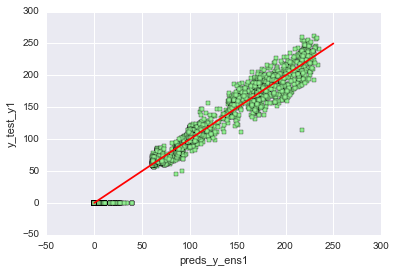

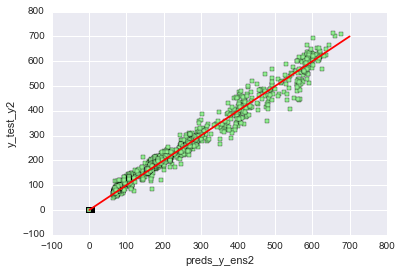

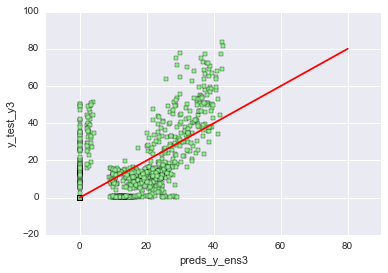

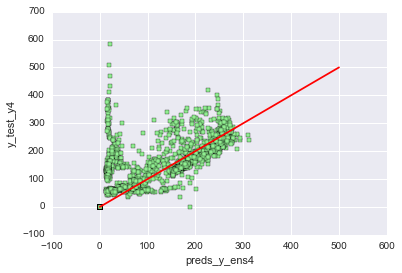

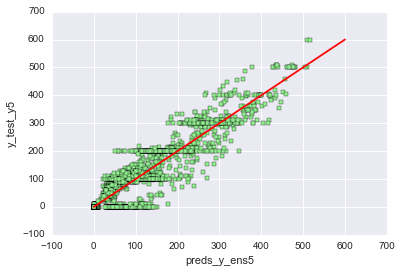

()

In [6]:
preds_y_ens1 = 0
preds_y_ens2 = 0
preds_y_ens3 = 0
preds_y_ens4 = 0
preds_y_ens5 = 0
for i in range(0, len(bestWght1)) :
    preds_y_ens1 += (bestWght1[i] * preds_y_test1[i])
    preds_y_ens2 += (bestWght2[i] * preds_y_test2[i])
    preds_y_ens3 += (bestWght3[i] * preds_y_test3[i])
    preds_y_ens4 += (bestWght4[i] * preds_y_test4[i])
    preds_y_ens5 += (bestWght5[i] * preds_y_test5[i])

# Plot predictions
def plotPreds(preds, reals, xlbl, ylbl, dim) :
    plt.scatter(preds, reals, c = "lightgreen", marker = "s", label = "")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.plot([0, dim], [0, dim], c = "red")
    plt.show()
    return()

plotPreds(preds_y_ens1, y_test_y1.y1, "preds_y_ens1", "y_test_y1", 250)
plotPreds(preds_y_ens2, y_test_y2.y2, "preds_y_ens2", "y_test_y2", 700)
plotPreds(preds_y_ens3, y_test_y3.y3, "preds_y_ens3", "y_test_y3", 80)
plotPreds(preds_y_ens4, y_test_y4.y4, "preds_y_ens4", "y_test_y4", 500)
plotPreds(preds_y_ens5, y_test_y5.y5, "preds_y_ens5", "y_test_y5", 600)


In [7]:
# Compute average error
totalError_y1 = mean_squared_error(y_test_y1.y1, preds_y_ens1) * y_test_y1.shape[0]
totalError_y2 = mean_squared_error(y_test_y2.y2, preds_y_ens2) * y_test_y2.shape[0]
totalError_y3 = mean_squared_error(y_test_y3.y3, preds_y_ens3) * y_test_y3.shape[0]
totalError_y4 = mean_squared_error(y_test_y4.y4, preds_y_ens4) * y_test_y4.shape[0]
totalError_y5 = mean_squared_error(y_test_y5.y5, preds_y_ens5) * y_test_y5.shape[0]
avgError = (totalError_y1 + totalError_y2 + totalError_y3 + totalError_y4 + totalError_y5) / preds_y_ens1.shape[0]
print("avgError : " + str(avgError))

avgError : 6163.21000871


In [8]:
# Load predictions on whole test set
preds_test1 = []
preds_test2 = []
preds_test3 = []
preds_test4 = []
preds_test5 = []

'''preds_test1.append(pd.read_csv("test_preds/XGB_Base.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/XGB_Base.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/XGB_Base.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/XGB_Base.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/XGB_Base.csv", sep = ";").y5)
preds_test1.append(pd.read_csv("test_preds/XGB_Time.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/XGB_Time.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/XGB_Time.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/XGB_Time.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/XGB_Time.csv", sep = ";").y5)'''
preds_test1.append(pd.read_csv("test_preds/XGB_Medians.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/XGB_Medians.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/XGB_Medians.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/XGB_Medians.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/XGB_Medians.csv", sep = ";").y5)
'''preds_test1.append(pd.read_csv("test_preds/XGB_Lags.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/XGB_Lags.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/XGB_Lags.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/XGB_Lags.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/XGB_Lags.csv", sep = ";").y5)

preds_test1.append(pd.read_csv("test_preds/Lasso_Base.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/Lasso_Base.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/Lasso_Base.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/Lasso_Base.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/Lasso_Base.csv", sep = ";").y5)
preds_test1.append(pd.read_csv("test_preds/Lasso_Time.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/Lasso_Time.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/Lasso_Time.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/Lasso_Time.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/Lasso_Time.csv", sep = ";").y5)
preds_test1.append(pd.read_csv("test_preds/Lasso_Medians.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/Lasso_Medians.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/Lasso_Medians.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/Lasso_Medians.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/Lasso_Medians.csv", sep = ";").y5)
preds_test1.append(pd.read_csv("test_preds/Lasso_Lags.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/Lasso_Lags.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/Lasso_Lags.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/Lasso_Lags.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/Lasso_Lags.csv", sep = ";").y5)'''

preds_test1.append(pd.read_csv("test_preds/LGBM_Medians.csv", sep = ";").y1)
preds_test2.append(pd.read_csv("test_preds/LGBM_Medians.csv", sep = ";").y2)
preds_test3.append(pd.read_csv("test_preds/LGBM_Medians.csv", sep = ";").y3)
preds_test4.append(pd.read_csv("test_preds/LGBM_Medians.csv", sep = ";").y4)
preds_test5.append(pd.read_csv("test_preds/LGBM_Medians.csv", sep = ";").y5)


In [9]:
# Prepare submission using optimal weights
preds_ens1 = 0
preds_ens2 = 0
preds_ens3 = 0
preds_ens4 = 0
preds_ens5 = 0
for i in range(0, len(bestWght1)) :
    preds_ens1 += (bestWght1[i] * preds_test1[i])
    preds_ens2 += (bestWght2[i] * preds_test2[i])
    preds_ens3 += (bestWght3[i] * preds_test3[i])
    preds_ens4 += (bestWght4[i] * preds_test4[i])
    preds_ens5 += (bestWght5[i] * preds_test5[i])


In [10]:
# Save test set preds on file
now = datetime.datetime.now()
testId = pd.read_csv("clean_data/testId.csv", header = None)
name = "test_preds/preds_ens_" + str(now.strftime("%Y-%m-%d-%H-%M")) + ".csv"
pd.DataFrame({"Id": testId[0], "y1": preds_ens1, "y2": preds_ens2, "y3": preds_ens3, "y4": preds_ens4, "y5": preds_ens5}, 
             columns = ["Id", "y1", "y2", "y3", "y4", "y5"]).to_csv(name, index = False, sep = ";")